In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [2]:
data = pd.read_excel('FPS_DATA.xlsx')

data.head()

,"SPEC(High, Mid, Low)",CPU NAME,CPU BenchMark,CPU Core,CPU Thread,CPU ClockSpeed GHZ,CPU ClockSpeed Turbo GHz,GPU NAME,GPU BenchMark,GPU Memory GB,GPU Clock MHz,GPU Clock Boost MHz,GAME NAME,RESOLUTION,GAME SETTING,GAME MIN FRAME,GAME AVG FRAME,GAME MAX FRAME
0,High,Intel Core i9-12900,38803,16,24,2.4,5.1,GeForce RTX 3090,26303,24.0,1560,1860,1,QHD,ULTRA,71,87,133
1,High,Intel Core i9-12900,38803,16,24,2.4,5.1,GeForce RTX 3090,26303,24.0,1560,1860,1,QHD,HIGH,96,117,179
2,High,Intel Core i9-12900,38803,16,24,2.4,5.1,GeForce RTX 3090,26303,24.0,1560,1860,1,QHD,MEDIUM,125,152,234
3,High,Intel Core i9-12900,38803,16,24,2.4,5.1,GeForce RTX 3080 Ti,26619,12.0,1365,1665,1,QHD,ULTRA,65,80,122
4,High,Intel Core i9-12900,38803,16,24,2.4,5.1,GeForce RTX 3080 Ti,26619,12.0,1365,1665,1,QHD,HIGH,88,108,162


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SPEC(High, Mid, Low)      330 non-null    object 
 1   CPU NAME                  330 non-null    object 
 2   CPU BenchMark             330 non-null    int64  
 3   CPU Core                  330 non-null    int64  
 4   CPU Thread                330 non-null    int64  
 5   CPU ClockSpeed GHZ        330 non-null    float64
 6   CPU ClockSpeed Turbo GHz  330 non-null    float64
 7   GPU NAME                  330 non-null    object 
 8   GPU BenchMark             330 non-null    int64  
 9   GPU Memory GB             330 non-null    float64
 10  GPU Clock MHz             330 non-null    int64  
 11  GPU Clock Boost MHz       330 non-null    int64  
 12  GAME NAME                 330 non-null    object 
 13  RESOLUTION                330 non-null    object 
 14  GAME SETTI

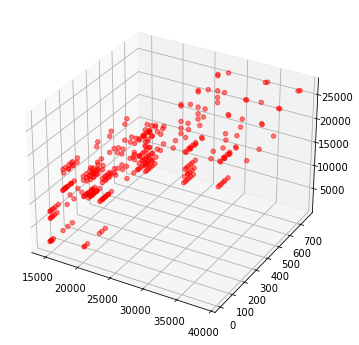

In [4]:
fig  = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

x = data['CPU BenchMark']
y = data['GPU BenchMark']
z = data['GAME AVG FRAME']

ax.scatter(x,z,y, color='r', alpha = 0.5)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['CPU BenchMark', 'GPU BenchMark', 'CPU Core', 'CPU Thread', 'GPU Memory GB', 'GPU Clock Boost MHz', 'GAME AVG FRAME']

df_scaled = data[scale_cols]

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols


In [23]:
print(df_scaled.shape)
df_scaled.head()

(330, 6)


,CPU BenchMark,GPU BenchMark,CPU Core,CPU Thread,GPU Memory GB,GPU Clock Boost MHz
0,1.0,0.987409,1.0,1.0,1.000000,0.921260
1,1.0,0.987409,1.0,1.0,1.000000,0.921260
2,1.0,0.987409,1.0,1.0,1.000000,0.921260
3,1.0,1.000000,1.0,1.0,0.489362,0.537402
4,1.0,1.000000,1.0,1.0,0.489362,0.537402


E:\Python\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


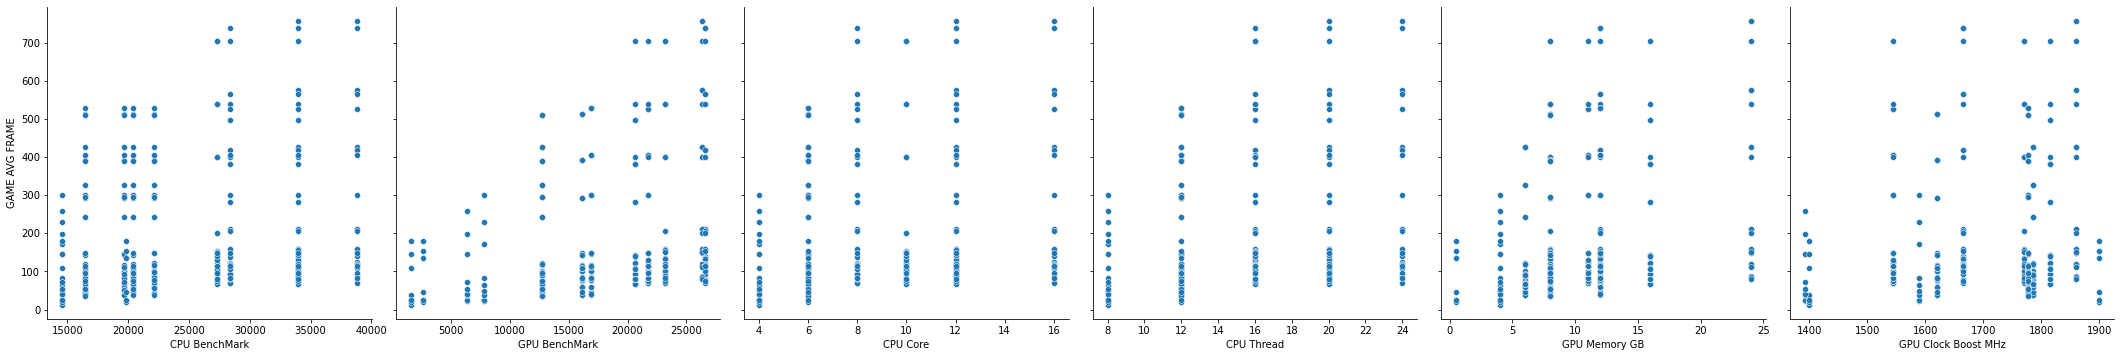

In [7]:
sns.pairplot(data=df_scaled, x_vars=['CPU BenchMark', 'GPU BenchMark', 'CPU Core', 'CPU Thread', 'GPU Memory GB', 'GPU Clock Boost MHz'], y_vars=['GAME AVG FRAME'], size=5)


In [8]:
y = df_scaled[['GAME AVG FRAME']].to_numpy()

df_scaled = df_scaled.drop(columns=['GAME AVG FRAME'])

In [9]:
x = df_scaled.values
columns = df_scaled.columns

scaler = preprocessing.MinMaxScaler()
tmp = scaler.fit_transform(x)
df_scaled = pd.DataFrame(tmp)
df_scaled.columns = columns

x = df_scaled.to_numpy()

In [ ]:
def model(df, delta):
    y = df[['GAME AVG FRAME']].to_numpy()
    X = df_scaled.values
    return np.squeeze(LinearRegression().fit(X, y).predict(delta))

In [ ]:
def group_predictions(df, frame):

    df['date_delta'] = df.date.sub(mn).div(day)

    dd = (date - mn) / day

    return df.groupby('group').apply(model, delta=frame)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=1)

In [11]:
lr = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [12]:
print("Train data Accuracy: ", format(lr.score(x_train, y_train)))

Train data Accuracy:  0.08580513294493863


In [13]:
y_predict  =lr.predict(x_test)

In [14]:
print("Test data Accuracy : ", format(lr.score(x_test, y_test)))
print("Test data Accuracy : ", format(r2_score(y_test, lr.predict(x_test))))

Test data Accuracy :  0.032076748193837434
Test data Accuracy :  0.032076748193837434


In [15]:
mean_absolute_error(y_test, y_predict)

142.464301659748

In [16]:
##Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 500, 1000]
learn_rates = [0.1, 0.5, 1]
max_depths = [1, 2, 3, 4]
min_samples_leaf = [5, 10, 15]
min_samples_split = [2, 5, 10]

param_grid = {'n_estimators' : num_estimators,
            'learning_rate' : learn_rates,
            'max_depth' : max_depths,
            'min_samples_leaf' : min_samples_leaf,
            'min_samples_split' : min_samples_split}
y_train = np.ravel(y_train, order='C')
grid_search = GridSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 500}

In [17]:

gb = GradientBoostingRegressor(min_samples_leaf = 10, min_samples_split = 5, learning_rate = 0.5, max_depth = 3, n_estimators = 1000)
gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, min_samples_leaf=10,
                          min_samples_split=5, n_estimators=1000)

In [18]:
### random forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50, random_state = 42)
rfr.fit(x_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [19]:
print("Train data Accuracy : ", format(rfr.score(x_train, y_train)))

Train data Accuracy :  0.11232595791529654


In [20]:
y_predict = rfr.predict(x_test)

In [21]:
print("Test data Accuracy : ", format(rfr.score(x_test, y_test)))
print("Test data Accuracy : ", format(r2_score(y_test, rfr.predict(x_test))))

Test data Accuracy :  -0.3610544056714562
Test data Accuracy :  -0.3610544056714562


In [22]:
mean_absolute_error(y_test, y_predict)

170.02762440024028